<a href="https://colab.research.google.com/github/ArldanaAbi/PCVK_Week3/blob/main/Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama | M Abiyyu Arldana S (2141720196 / 3D)

Akses folder images pada Google Drive Anda dengan kode berikut:

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## **Transformasi Linier Brightness**
Formula:

g(x,y) = f(x,y) + b

Keterangan:

- g(x,y) adalah nilai pixel setelah transformasi
- f(x,y) adalah nilai pixel asli
- b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


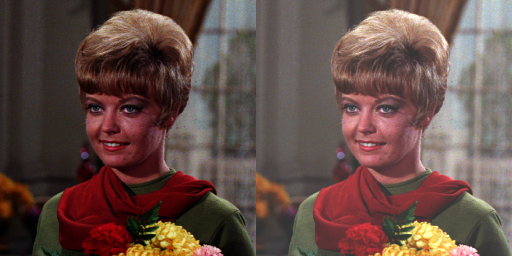

In [44]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread("/content/drive/MyDrive/female.tiff") # get image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

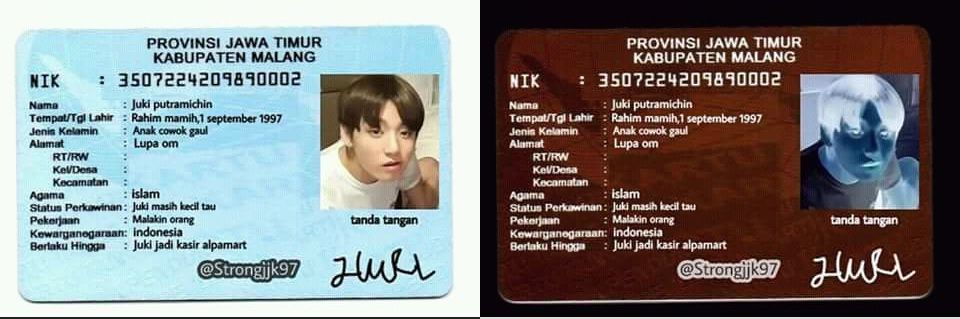

In [50]:
img = cv.imread("/content/drive/MyDrive/as.jpeg")
img_inverse = 255 - img

hasil=cv.hconcat((img,img_inverse))
cv2_imshow(hasil)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


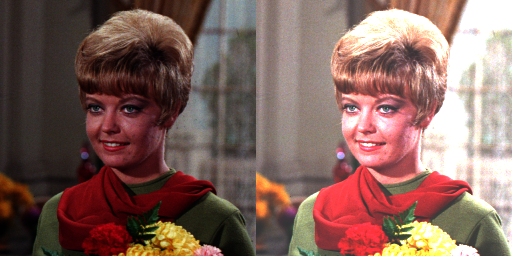

In [46]:
try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Masukkan nilai kecerahan: 50


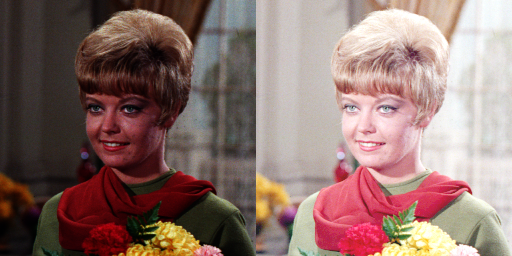

In [47]:
try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

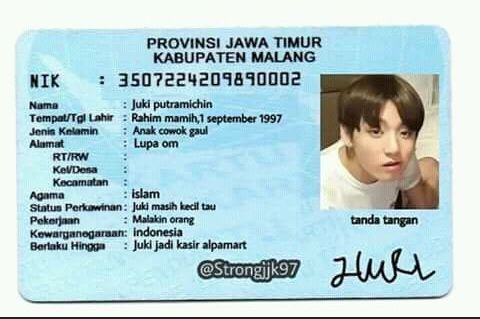

In [61]:
img_rgb = cv.imread('/content/drive/MyDrive/as.jpeg')
cv2_imshow(hasil)

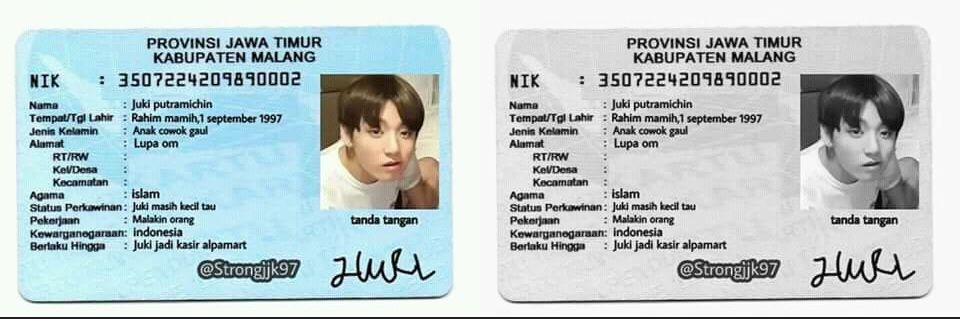

In [60]:
#averaging

img_avg = cv.imread('/content/drive/MyDrive/as.jpeg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)

hasil=cv.hconcat((img_rgb,img_avg))
cv2_imshow(hasil)

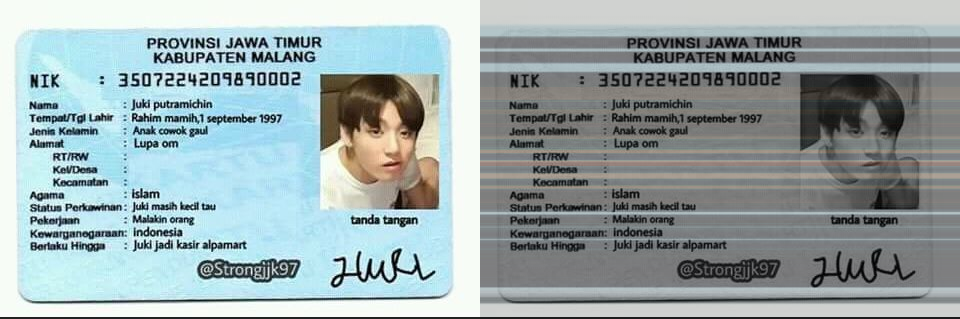

In [67]:
#lightness

img_light = cv.imread('/content/drive/MyDrive/as.jpeg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3

hasil=cv.hconcat((img_rgb,img_light))
cv2_imshow(hasil)

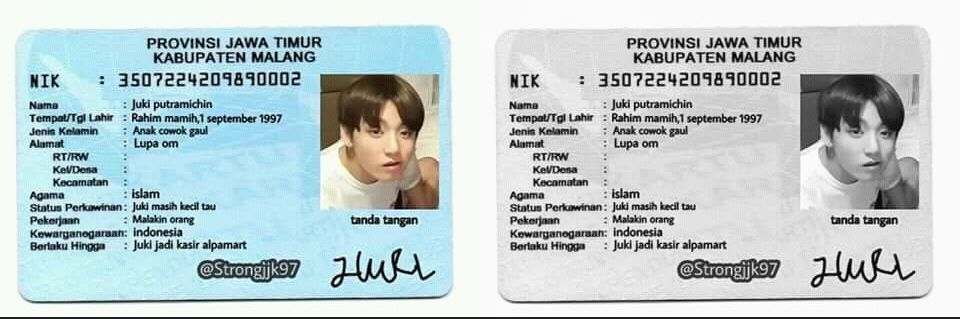

In [77]:
#luminance

def grayscaleLuminance(image):
    brightness_image = np.zeros(image.shape,image.dtype)

    for ye in range(image.shape[0]):
        for xe in range(image.shape[1]):
            for c in range(image.shape[2]):
                red = image[ye, xe, 2]*0.21  # Saluran merah (indeks 2)
                green = image[ye, xe, 1]*0.72  # Saluran hijau (indeks 1)
                blue = image[ye, xe, 0]*0.07  # Saluran biru (indeks 0)
                maxmin=red+green+blue
                brightness_image[ye, xe, c] = np.clip(maxmin, 0, 255)
    return brightness_image

path='/content/drive/MyDrive/as.jpeg'
ktp = cv.imread(path)
converted= grayscaleLuminance(ktp)

final_frame=cv.hconcat ((ktp,converted))
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

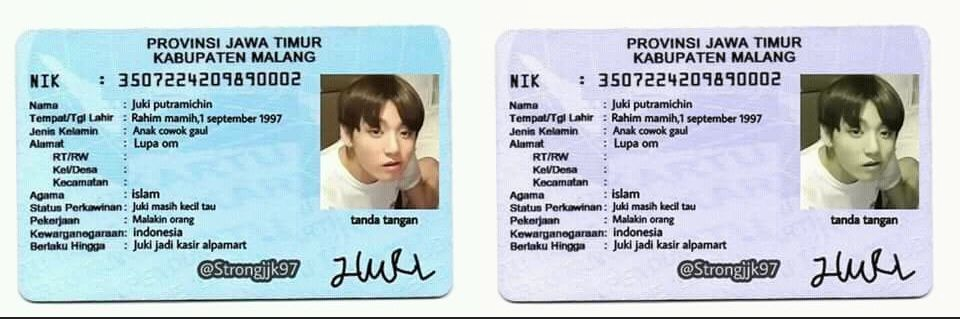

In [78]:
from numpy.ma.extras import average
original = cv.imread('/content/drive/MyDrive/as.jpeg')
inverse_image = np.zeros(original.shape, original.dtype)



for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        r = original[y,x,2]*0.21
        g = original[y,x,1]*0.72
        b = original[y,x,0]*0.07

        maxmin=(r+g+b)

        inverse_image[y,x,2] = np.clip(maxmin, 0, 255)
        inverse_image[y,x,1] = np.clip(maxmin, 0, 255)
        inverse_image[y,x,0] = original[y,x,0]




final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)